Importing the python packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import cv2

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Reading the training and test files

In [0]:
file1 = "/content/drive/My Drive/Colab Notebooks/intern/Vision_task_dataset_public/train_image.pkl"
file2 = "/content/drive/My Drive/Colab Notebooks/intern/Vision_task_dataset_public/train_label.pkl"
file3 = "/content/drive/My Drive/Colab Notebooks/intern/Vision_task_dataset_public/test_image.pkl"

In [0]:

with open(file1, 'rb') as f:
    train1 = pickle.load(f)
with open(file2, 'rb') as f2:
    ytrain1 = pickle.load(f2)
with open(file3, 'rb') as f3:
    Xtest = pickle.load(f3)

Resizing the training and test set

In [0]:
Xtrain = train1
ytrain = ytrain1

In [6]:
print(len(Xtrain))
print(len(ytrain))
Xtrain = np.array(Xtrain)
ytrain = np.array(ytrain)

8000
8000


In [7]:
print(Xtrain.shape)
print(ytrain.shape)
Xtest = np.array(Xtest)
print(Xtest.shape)

(8000, 784)
(8000,)
(2000, 784)


In [8]:
print(np.unique(ytrain))

[0 2 3 6]


In [0]:
#for i in ytrain:
#    print(i, end = " ")

Displaying sample training data

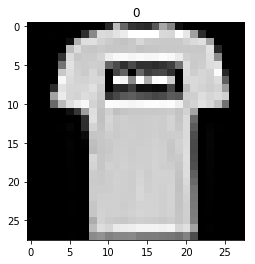

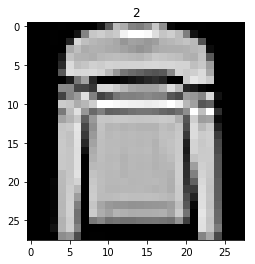

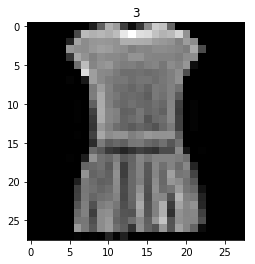

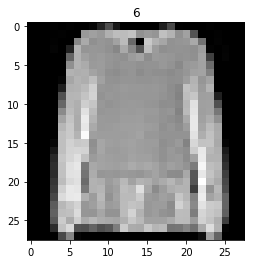

In [10]:
lis = [0,2,3,6]
for i in lis:
    imx = Xtrain[ytrain==i]
    imx = np.resize(imx, (28,28))
    plt.imshow(imx, cmap = 'gray')
    plt.title(i)
    plt.show()



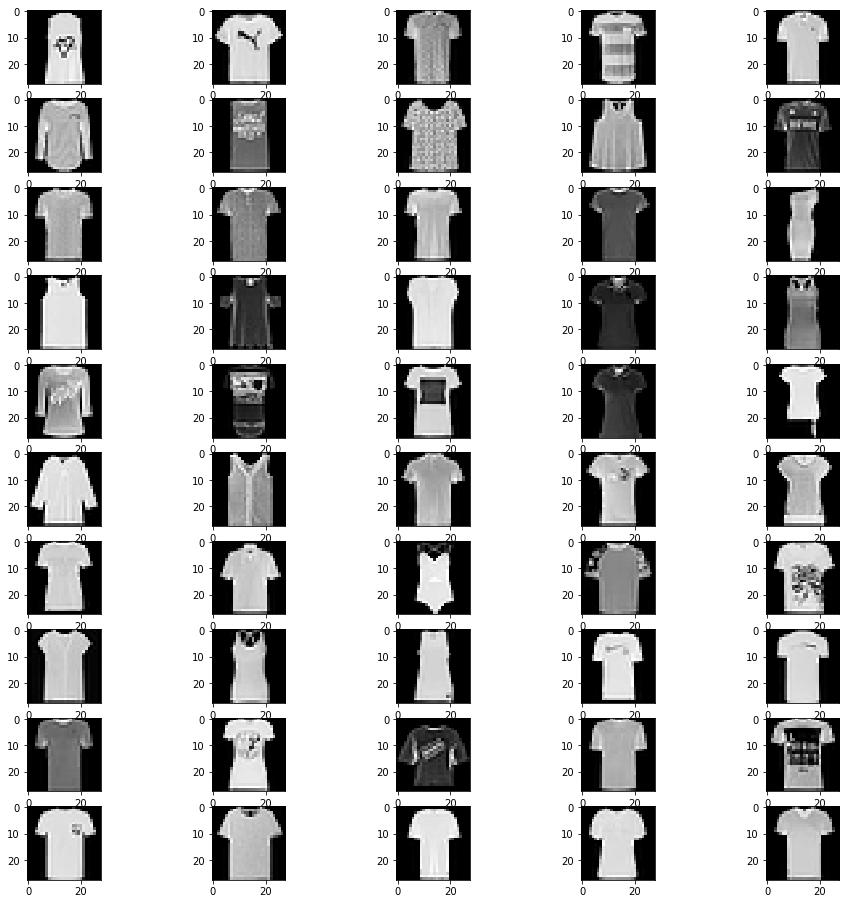

In [11]:
plt.figure(figsize=(16,16))
j = 0
for i in range(100,150):
    plt.subplot(10,5,j+1)
    i = np.array(Xtest[i])
    i = np.resize(i, (28,28))
    j+=1
    plt.imshow(i, cmap = 'gray')

plt.show()

Making the range of training values in a consecutive form for keras

In [0]:
for i in range(len(ytrain)):
    if ytrain[i] == 2:
        ytrain[i] = 1
    elif ytrain[i] == 3:
        ytrain[i] = 2
    elif ytrain[i] == 6:
        ytrain[i] = 3

In [13]:
print(np.unique(ytrain))

[0 1 2 3]


In [0]:
Xtrain = np.resize(Xtrain,(8000, 28,28,1))
Xtest = np.resize(Xtest, (2000, 28,28,1))

In [15]:
print(Xtrain.shape)
print(Xtest.shape)

(8000, 28, 28, 1)
(2000, 28, 28, 1)


In [16]:
print(Xtrain[0].shape)
print(Xtest[0].shape)

(28, 28, 1)
(28, 28, 1)


Normalizing training and test data

In [0]:
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')

Xtrain /= 255
Xtest /= 255


In [0]:
#plt.imshow(Xtrain[0,:,:,0], cmap = 'gray')
#plt.show()

In [0]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.05, random_state=1)


In [20]:
print(Xtrain.shape)
print(Xval.shape)

(7600, 28, 28, 1)
(400, 28, 28, 1)


In [0]:
#Xtrain = Xtrain.reshape(Xtrain.shape[0], 28, 28, 1)
#Xval = Xval.reshape(Xval.shape[0], 28, 28, 1)
#Xtest = Xtest.reshape(Xtest.shape[0], 28, 28, 1)

Training the model

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

batch_size = 256
num_classes = 4
epochs = 50

rows, cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape = (rows, cols, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
res = model.fit(Xtrain, ytrain,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(Xval, yval))


Instructions for updating:
Use tf.cast instead.
Train on 7600 samples, validate on 400 samples
Epoch 1/50
7600/7600 [==============================] - 6s 741us/step - loss: 1.0386 - acc: 0.5354 - val_loss: 0.8018 - val_acc: 0.6450
Epoch 2/50
7600/7600 [==============================] - 1s 70us/step - loss: 0.7413 - acc: 0.6674 - val_loss: 0.6794 - val_acc: 0.7075
Epoch 3/50
7600/7600 [==============================] - 1s 70us/step - loss: 0.6569 - acc: 0.7088 - val_loss: 0.6142 - val_acc: 0.7525
Epoch 4/50
7600/7600 [==============================] - 1s 69us/step - loss: 0.5867 - acc: 0.7549 - val_loss: 0.5324 - val_acc: 0.8025
Epoch 5/50
7600/7600 [==============================] - 1s 69us/step - loss: 0.5443 - acc: 0.7787 - val_loss: 0.5098 - val_acc: 0.7975
Epoch 6/50
7600/7600 [==============================] - 1s 69us/step - loss: 0.5071 - acc: 0.7983 - val_loss: 0.4616 - val_acc: 0.8300
Epoch 7/50
7600/7600 [==============================] - 1s 70us/step - loss: 0.4833 - acc: 0.8

In [24]:
print(Xtest.shape)

(2000, 28, 28, 1)


Prediction for the test data

In [0]:
ytest = model.predict_classes(Xtest)

In [27]:
for i in ytest:
  print(i, end = " ")

0 3 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 3 0 0 0 3 0 3 1 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 1 0 3 3 0 0 0 0 0 2 0 3 3 0 0 0 0 0 0 3 3 3 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0 2 0 0 0 3 3 0 3 3 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 3 0 0 0 2 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 3 0 3 3 0 0 0 0 3 1 0 0 3 1 3 0 0 0 0 0 3 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 3 0 0 0 1 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 1 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 3 0 0 0 0 1 0 0 0 0 2 3 0 0 3 0 3 0 3 0 1 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 3 0 0 0 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 1 2 3 0 0 0 0 0 0 3 0 3 0 2 0 0 0 0 0 0 3 0 0 0 0 3 0 0 3 0 0 0 0 3 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 0 0 0 

In [28]:
print(np.unique(ytest))

[0 1 2 3]


In [29]:
for i in range(len(ytest)):
  if ytest[i]==1:
    ytest[i] = 2
  elif ytest[i]==2:
    ytest[i] = 3
  elif ytest[i]==3:
    ytest[i]=6
print(np.unique(ytest))

[0 2 3 6]


Storing the work in the csv file

In [31]:
'''for i in range(len(ytrain)):
    if ytrain[i] == 2:
        ytrain[i] = 1
    elif ytrain[i] == 3:
        ytrain[i] = 2
    elif ytrain[i] == 6:
        ytrain[i] = 3'''
print(ytest.shape)
print(type(ytest))

(2000,)
<class 'numpy.ndarray'>


In [0]:
import pandas as pd
df = pd.DataFrame(columns = ('image_index', 'class'))

In [51]:
df

,image_index,class


In [0]:
row = []
for i in range(len(ytest)):
  temp = pd.DataFrame({'image_index':[i],
                       'class':[ ytest[i] ] 
                      }
                     )
  df.append(temp)

In [53]:
df

,image_index,class


In [55]:
row = []
for i in range(len(ytest)):
  row.append(i)

print(len(row))

2000


In [0]:
data = {"image_index":row, 
        "class":ytest}

df2 = pd.DataFrame(data)
df2 = df2[["image_index", "class"]]

In [68]:
df2

,image_index,class
0,0,0
1,1,6
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [0]:
df2.to_csv("finalfile", encoding='utf-8', index=False)